In [17]:
from bs4 import BeautifulSoup 
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
products = []  # List to store names of the products
prices = []    # List to store prices of the products
ratings = []   #List to store ratings of the products
  

In [19]:
sp = requests.get("https://www.flipkart.com/beds/pr?sid=wwe,7p7&otracker=nmenu_sub_Home%20%26%20Furniture_0_Beds")
sp = BeautifulSoup(sp.content, 'html.parser')

In [20]:
for each in sp.find_all('div',attrs={'class':'_4ddWXP'}):    # Caters for instances where the name does not exist
    name = each.find('div', attrs={'class':'_3Djpdu'})
    price = each.find('div', attrs={'class':'_30jeq3'})
    rate = each.find('div', attrs={'class':'_3LWZlK'})

    if name is None:   
        products.append(None)
    else:
        products.append(name.text)  # Get the text part
    if price is None:  
        prices.append(None)
    else:
        prices.append(price.text)
        
    if rate is None:     # Caters for instances where the rating does not exist - which was causing an error initially
        ratings.append(None)
    else:
        ratings.append(rate.text)

     

In [21]:
# Structuring and storing data
df = pd.DataFrame({'Product Name': products, 'Price': prices, 'Rating': ratings}) 
print(df.to_string())

                                                                     Product Name    Price Rating
0               Finish Color - American Espresso, Delivery Condition - Knock Down  ₹11,299      4
1                 Finish Color - Chocolate Wenge, Delivery Condition - Knock Down   ₹9,899    4.1
2                      Finish Color - Dark Black, Delivery Condition - Knock Down   ₹6,990      4
3                 Finish Color - Chocolate Wenge, Delivery Condition - Knock Down  ₹14,699      4
4     Finish Color - American Espresso and Wenge, Delivery Condition - Knock Down  ₹16,199      4
5                   Finish Color - Almond Walnut, Delivery Condition - Knock Down  ₹11,299      4
6                 Finish Color - Melamine Walnut, Delivery Condition - Knock Down  ₹11,299      4
7                           Finish Color - Wenge, Delivery Condition - Knock Down   ₹9,799    3.7
8                 Finish Color - Chocolate Wenge, Delivery Condition - Knock Down  ₹10,099    4.1
9                   

In [22]:
# Output the DataFrame to CSV file
df.to_csv('products.csv', index = True)

In [27]:
# Data Visualization
df2 = pd.read_csv("products.csv")

Text(0.5, 1.0, 'Rating against Price')

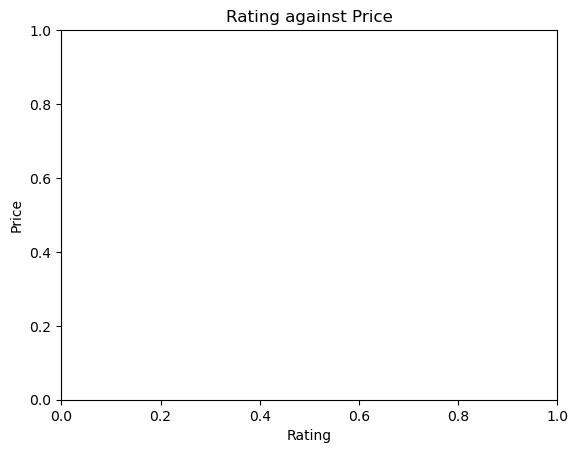

In [28]:
plt.xlabel("Rating")
plt.ylabel("Price")
plt.title("Rating against Price")

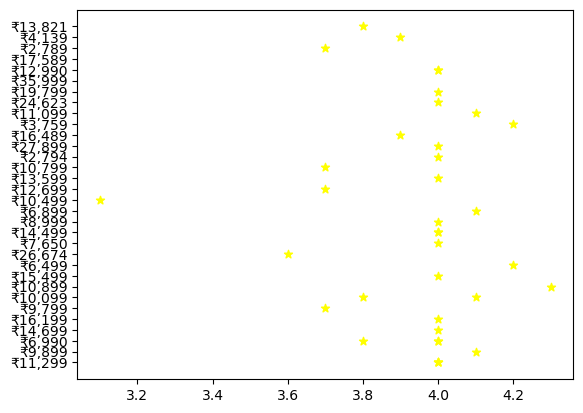

In [34]:
plt.scatter(df2.Rating, df2.Price, marker="*", c = 'yellow', alpha = 1)    # Line graph - The labels above apply for this plot only
# marker: format can be o or * , c: color, alpha: opacity(Range: 0-1)
plt.show()
